In [1]:
# apriamo il file dei descrittori presi da MOE per intero
import pandas as pd
import numpy as np

filename = "./data/1130_alldesc_notdormol.csv"
descdata = pd.read_csv(filename)

filename2 = "./data/data.xlsx"
logddata = pd.read_excel(filename2)
logddata = logddata.rename(columns={"NO": "Unique_ID"})

print(descdata.head)
print(logddata.head)




<bound method NDFrame.head of                                                     mol      Unique_ID  \
0         Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1  A-logD7.4-100   
1             O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1  A-logD7.4-101   
2                              O=C1C(O)=C(C)N(CCCO)C=C1  A-logD7.4-104   
3     Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...  A-logD7.4-105   
4                        O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1  A-logD7.4-106   
...                                                 ...            ...   
1125                                O=C(O)CC1(CN)CCCCC1            O-8   
1126                                O=C1Oc2c(cccc2)C=C1           O-94   
1127                      Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1           O-97   
1128  O=C(CO)[C@@]1(O)[C@@]2(C)[C@@H]([C@@H]3[C@@H](...           O-98   
1129  O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...            O-9   

      AM1_dipole       AM1_E   AM1_Eele      AM1_HF  AM1_HOMO   AM1_IP  \
0      

In [2]:
# merge dei 2 dataframe
merged_dataframe = pd.merge(logddata, descdata, on='Unique_ID')
print(merged_dataframe.head)

<bound method NDFrame.head of           Unique_ID DatasetID  \
0     A-logD7.4-100        Tr   
1     A-logD7.4-101        Tr   
2     A-logD7.4-104        Tr   
3     A-logD7.4-105        Tr   
4     A-logD7.4-106        Tr   
...             ...       ...   
1125           O-88        Tr   
1126            O-9        Tr   
1127           O-94        Tr   
1128           O-97        Te   
1129           O-98        Tr   

                                                 SMILES   LogD  \
0           Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1 -0.960   
1           S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1 -0.920   
2                               OC=1C(=O)C=CN(CCCO)C=1C -0.900   
3       Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1 -0.830   
4                         OC=1C(=O)C=CN(CCC(=O)NCC)C=1C -0.820   
...                                                 ...    ...   
1125                        O(CC(O)CNC(C)C)c1ccccc1CC=C  1.000   
1126  O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(O

In [3]:
ydata = merged_dataframe['LogD'].values
print(ydata)

[-0.95999998 -0.92000002 -0.89999998 ...  1.415       1.67
  1.53      ]


In [4]:
merged_dataframe = merged_dataframe[merged_dataframe["nmol"] != 2]
print(merged_dataframe.shape)

(1117, 359)


In [5]:
merged_dataframe.to_excel("Merged.xlsx")

In [6]:
merged_dataframe = merged_dataframe.drop('nmol', axis=1)
merged_dataframe
print(merged_dataframe.shape)

(1117, 358)


In [7]:
list_of_desc = ["a_acc", \
                  "a_base", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol"]

In [8]:
X = []
Y = []
setid = []
for idx, ss in enumerate(merged_dataframe["Unique_ID"]):
    
    fdesc = merged_dataframe[merged_dataframe["Unique_ID"] == ss]
    
    xval = []
    for d in list_of_desc:
        xval.append(fdesc[d].values[0])

    X.append(xval)
    Y.append(merged_dataframe[merged_dataframe["Unique_ID"] == ss]["LogD"].values[0])
    setid.append(merged_dataframe[merged_dataframe["Unique_ID"] == ss]["DatasetID"].values[0])
    print(len(Y))
    
for idx, y in enumerate(Y):
    print(setid[idx], X[idx], y)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Tr [4, 0, 23.723312, 2, 5, 0.18518518, 7.493166400000001, 12, 4.3730001, -4.8529301, 61.960964000000004, 0.0, 106.74055, 0.0, 27.133841999999998, 166.45641, 10.999887, 14.90334, 23.862217, 25.385227, 32.990111999999996, 0.0, 12.898981, 13.004248, 68.529999, 16.070677, 27.65803, 43.204516999999996, 42] 1.61
Tr [5, 0, 39.229588, 3, 11, 0.2682927, 11.109323, 22, 4.698, -6.7368398, 47.467106, 17.238026, 108.94908000000001, 0.0, 27.133841999999998, 257.77539, 10.999887, 56.98001899999999, 38.190426, 64.75106, 33.418941, 18.868406, 29.084314000000003, 57.200039000000004, 107.97, 29.637597999999997, 45.098572, 68.136589, 57] 1.61
Tr [3, 0, 22.748070000000002, 1, 2, 0.11764706, 2.3045304, 8, 2.8840001, -3.5893900000000003, 44.972522999999995, 0.0, 47.417389, 0.0, 0.0, 116.26494, 18.01075, 68.081528, 10.622711, 0.0, 0.0, 0.0, 15.179776, 1.8990928, 70.559998, 40.091728, 25.787182, 51.456882, 23] 1.63
Tr [6, 0, 54.962692000000004, 5, 18, 0.33962265, 14.031973, 21, 2.9230001, -6.982130099999999, 1

Tr [8, 0, 45.675003000000004, 0, 13, 0.38235295, 7.9350882, 21, 2.204, -3.0899999, 92.258354, 21.35475, 60.560478, 0.0, 5.682576200000001, 308.50174, 68.781204, 81.74274399999999, 17.879154, 113.1988, 9.1278973, 18.868406, 84.341515, 113.1988, 121.64, 45.885433, 21.438392999999998, 78.701851, 43] 1.5599999
Tr [9, 0, 53.677418, 0, 15, 0.39473686, 8.265986400000001, 23, 2.273, -3.8727300000000002, 57.421020999999996, 42.078487, 44.958763, 0.0, 0.0, 320.06872999999996, 68.781204, 129.53391000000002, 24.519897, 113.1988, 6.37115, 18.868406, 67.555984, 113.1988, 154.92, 72.219376, 31.544001, 113.111, 48] 1.34
Tr [7, 0, 45.177795, 0, 13, 0.35135135, 9.0993195, 21, 3.3640001000000006, -5.632999900000001, 58.225266000000005, 21.35475, 51.859165000000004, 0.0, 0.0, 299.91647, 68.781204, 64.95721400000001, 17.879154, 113.1988, 8.6343956, 18.868406, 67.555984, 113.1988, 121.89, 40.202853999999995, 40.859188, 73.019272, 47] 2.8599999
Te [8, 0, 42.828590000000005, 0, 14, 0.40000001, 8.6742344, 22, 

Tr [3, 0, 27.719761, 1, 8, 0.44444445, 6.236382, 11, 2.6210001, -2.8122399, 63.25753, 0.0, 60.660109999999996, 22.301268, 0.0, 153.16931, 54.395866000000005, 0.0, 10.450617999999999, 39.365837, 3.185575, 0.0, 36.385113, 39.365837, 41.490002000000004, 2.503756, 0.0, 21.753254000000002, 21] 1.0
Tr [6, 0, 39.976172999999996, 1, 5, 0.16129032, 5.3745747, 15, 0.25573999, -3.7069099000000003, 154.04753, 0.0, 41.912434000000005, 0.0, 20.21804, 303.60953, 58.021278, 41.954155, 41.330753, 94.68457, 0.0, 37.736813, 58.695147999999996, 99.943352, 103.04, 32.44334, 39.821667, 50.185829, 47] 1.14
Tr [1, 0, 9.433241800000001, 2, 0, 0.0, 3.9663265, 6, 2.175, -2.7709999, 14.463444, 0.0, 24.509808, 0.0, 16.070677, 63.222778000000005, 10.999887, 7.7454643, 23.862217, 0.0, 3.185575, 17.643185, 10.999887, 25.388648999999997, 26.299999, 13.566920999999999, 17.212255, 13.566920999999999, 14] 1.415
Te [2, 0, 9.585656199999999, 2, 2, 0.14285715, 2.8914115000000002, 8, 3.4300001000000004, -3.3868001000000003, 

In [9]:
Xtr = []
Xte = []
Ytr = []
Yte = []
for idx, y in enumerate(Y):
    if setid[idx] == "Tr":
        Xtr.append(X[idx])
        Ytr.append(Y[idx])
    elif setid[idx] == "Te":
        Xte.append(X[idx])
        Yte.append(Y[idx])
        
print("    Test set: ", len(Yte), len(Xte))
print("Training set: ", len(Ytr), len(Xtr))

    Test set:  225 225
Training set:  892 892


   1 2.17669162 0.36346193
   2 1.54010532 0.54962124
   3 1.18782865 0.65263883
   4 1.02824460 0.69930659
   5 0.86502369 0.74703789
   6 0.76214840 0.77712209
   7 0.73269686 0.78573472
   8 0.76057070 0.77758347
   9 0.65456011 0.80858454
  10 0.64412180 0.81163705
  11 0.62562499 0.81704614
  12 0.62551174 0.81707926
  13 0.60882174 0.82195998
  14 0.59968897 0.82463071
  15 0.58901533 0.82775204
  16 0.59064341 0.82727594
  17 0.59033662 0.82736565
  18 0.58859889 0.82787383
  19 0.59076717 0.82723975
  20 0.58494960 0.82894100
  21 0.58836271 0.82794289
  22 0.58726607 0.82826359
  23 0.58816910 0.82799951
  24 0.58788163 0.82808358
  25 0.58781962 0.82810171
  26 0.58791353 0.82807425
  27 0.58792124 0.82807199
  28 0.58788215 0.82808342
Suggested number of components tr:  20


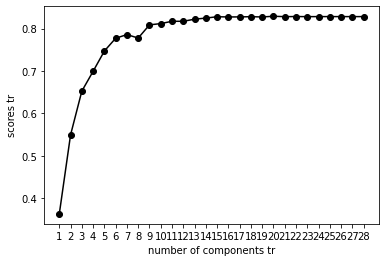

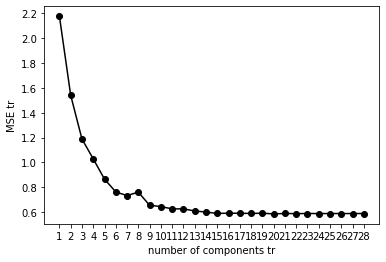

In [10]:
# valutazione del numero di componenti principali ideale da usare per costruire il modello PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

trscores = []
trmses = []
trncomps = []
for trncomp in range(1,29):
    pls = PLSRegression(trncomp)
    pls.fit(Xtr, Ytr)
    
    y_cv = cross_val_predict(pls, Xtr, Ytr, cv=10)
    
    trscore = r2_score(Ytr, y_cv)
    trmse = mean_squared_error(Ytr, y_cv)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trncomps.append(trncomp)
    print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Suggested number of components tr: ", msetrmin+1)
    
plt.plot(trncomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trncomps)
plt.show()

plt.plot(trncomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trncomps)
plt.show()

In [11]:
ncompsugg = 20

pls_20 = PLSRegression(ncompsugg)
pls_20.fit(Xtr, Ytr)
    
y_cv20 = cross_val_predict(pls_20, Xtr, Ytr, cv=10)
    
score20cv = r2_score(Ytr, y_cv20)
mse20cv = mean_squared_error(Ytr, y_cv20)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(ncompsugg, mse20cv, score20cv))

comp:   20 MSE: 0.58494960 score: 0.82894100


In [12]:
ncompgraf = 9

pls_9 = PLSRegression(ncompgraf)
pls_9.fit(Xtr, Ytr)
    
y_cv9 = cross_val_predict(pls_9, Xtr, Ytr, cv=10)
    
score9cv = r2_score(Ytr, y_cv9)
mse9cv = mean_squared_error(Ytr, y_cv9)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(ncompgraf, mse9cv, score9cv))

comp:    9 MSE: 0.65456011 score: 0.80858454


-0.7400000  0.7182857 -1.4582857  0.9236318 -1.6636319
-0.6800000 -0.3708587 -0.3091413 -0.3791108 -0.3008892
-0.5000000 -0.3480314 -0.1519686 -0.3087981 -0.1912019
-0.3900000  0.4729432 -0.8629431  0.2961065 -0.6861065
-0.3400000  0.5127613 -0.8527613  0.6881510 -1.0281510
-0.2100000 -0.3160388  0.1060388 -0.3732263  0.1632263
-0.1900000 -1.5094879  1.3194879 -1.5255494  1.3355494
-0.1300000  1.0510552 -1.1810552  1.0759973 -1.2059973
-0.0400000  0.0201323 -0.0601323  0.0139802 -0.0539802
 0.0500000  0.1582855 -0.1082855 -0.1047710  0.1547710
 0.2000000  1.2430526 -1.0430526  1.1510468 -0.9510468
 0.2100000 -0.3465345  0.5565345 -0.4042817  0.6142817
 0.3000000  0.0684230  0.2315770  0.2918941  0.0081059
 0.3000000  0.7931687 -0.4931687  0.9025315 -0.6025315
 0.4000000  1.4095854 -1.0095854  0.8783377 -0.4783377
 0.6400000  1.7362814 -1.0962814  1.9011635 -1.2611635
 0.6930000  0.1673369  0.5256631 -0.0039856  0.6969856
 0.9800000  0.5436577  0.4363423  0.6246572  0.3553428
 1.1000000

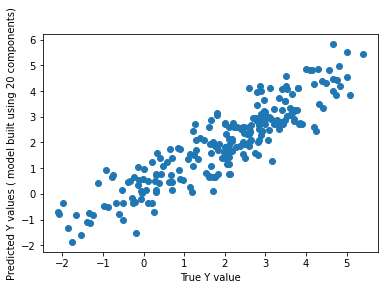

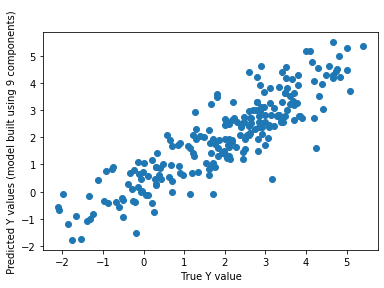

In [13]:
Y_pred20 = pls_20.predict(Xte)
Y_pred9 = pls_9.predict(Xte)

mse_pred20 = mean_squared_error(Yte, Y_pred20 )
mse_pred9 = mean_squared_error(Yte, Y_pred9 )
RMSE_pred20 = mean_squared_error(Yte, Y_pred20, squared = False )
RMSE_pred9 = mean_squared_error(Yte, Y_pred9, squared = False )

diff9 = []
diff20 = []

for idx, val in enumerate(Yte):
    diff9.append(val-Y_pred9[idx])
    diff20.append(val-Y_pred20[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred20[idx], diff20[-1], \
                            Y_pred9[idx], diff9[-1]))
    
print("MSE 20 comp: ", mse_pred20) 
print("MSE 9 comp: ", mse_pred9)
score20 = r2_score(Yte, Y_pred20 )
print(" score modello a 20 componenti :", score20 )
score9 = r2_score(Yte, Y_pred9 )
print(" score modello a 9 componenti :", score9 )
print(" RMSE modello a 20 componenti :", RMSE_pred20)
print(" RMSE modello a 9 componenti :", RMSE_pred9)


plt.xlabel("True Y value")
plt.ylabel("Predicted Y values ( model built using 20 components)")

plt.scatter(Yte, Y_pred20)

plt.show()

plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values (model built using 9 components) ")

plt.scatter(Yte, Y_pred9)

plt.show()

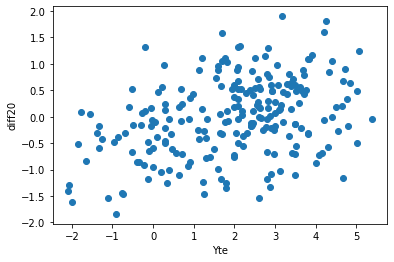

In [14]:
# GRAFICO : RESIDUI ORDINARI modello a 20 vs Yte
plt.xlabel("Yte")
plt.ylabel("diff20")
plt.scatter( Yte, diff20)
plt.show()

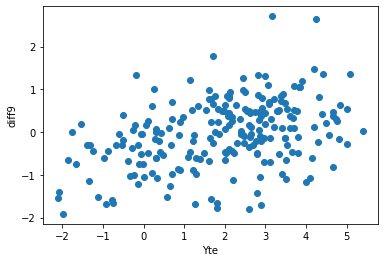

In [15]:
# GRAFICO : RESIDUI ORDINARI modello a 9 vs Yte
plt.xlabel("Yte")
plt.ylabel("diff9")
plt.scatter( Yte, diff9)
plt.show()

In [16]:
Y_predtot20 = pls_20.predict(X)
Y_predtot9 = pls_9.predict(X)

In [17]:
diff9tot = []
diff20tot =[]

for idx, val in enumerate(Y):
    diff9tot.append(val-Y_predtot9[idx])
    diff20tot.append(val-Y_predtot20[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_predtot20[idx], diff20tot[-1], \
                            Y_predtot9[idx], diff9tot[-1]))

-0.9600000 -1.1046530  0.1446530 -0.8830092 -0.0769908
-0.9200000 -0.3767038 -0.5432962 -0.3977203 -0.5222798
-0.9000000 -0.7431365 -0.1568635 -0.8855714 -0.0144286
-0.8300000 -0.4470539 -0.3829461 -0.2997847 -0.5302153
-0.8200000 -0.7530332 -0.0669668 -0.7694649 -0.0505351
-0.7900000 -0.9313002  0.1413001 -0.5992870 -0.1907130
-0.7800000  0.2468014 -1.0268014  0.1181886 -0.8981886
-0.7700000 -0.4370092 -0.3329908 -0.5278904 -0.2421096
-0.7700000 -0.4389089 -0.3310911 -0.6782791 -0.0917209
-0.7700000 -0.5981383 -0.1718617 -0.6330920 -0.1369080
-0.7500000  0.5713751 -1.3213751  0.7668391 -1.5168391
-0.7500000 -0.4072597 -0.3427403 -0.5726671 -0.1773329
-0.7400000  0.7182857 -1.4582857  0.9236318 -1.6636319
-0.7300000  0.3915686 -1.1215687  0.8768530 -1.6068530
-0.7300000 -0.2115209 -0.5184791 -0.0925332 -0.6374668
-0.7000000  0.6660217 -1.3660217  0.5860918 -1.2860917
-0.6800000 -0.3708587 -0.3091413 -0.3791108 -0.3008892
-0.6700000 -0.8659365  0.1959365 -0.8040627  0.1340626
-0.6600000

 2.3800001  1.7909037  0.5890964  0.8211498  1.5588503
 2.1300001  0.7898918  1.3401083  1.1903782  0.9396219
 2.0599999  3.2393888 -1.1793889  2.9051158 -0.8451159
-0.7700000  0.6686884 -1.4386884  0.8209477 -1.5909476
-0.0700000 -0.1574983  0.0874983  0.3783877 -0.4483877
 2.4100001  1.6306058  0.7793943  1.6343262  0.7756739
-0.5100000 -1.0330139  0.5230139 -0.9146674  0.4046674
-0.3000000  0.3008668 -0.6008668  0.6445452 -0.9445452
 2.4900000  1.5707409  0.9192591  1.6879703  0.8020297
 0.6800000  0.5475317  0.1324683  0.4250660  0.2549340
 2.7000000  1.7247542  0.9752458  2.0042997  0.6957003
-0.5600000  0.3627117 -0.9227117 -0.0379128 -0.5220872
-0.4000000 -0.6856992  0.2856992 -0.7391821  0.3391821
-0.1100000 -0.4935167  0.3835167 -0.9782581  0.8682581
 3.5300000  3.1375456  0.3924544  3.0023068  0.5276932
-0.5000000 -1.3669988  0.8669988 -1.1401091  0.6401091
-1.2500000 -0.8341952 -0.4158048 -0.8067403 -0.4432597
 1.8300000  1.2476238  0.5823762  1.4523647  0.3776353
 4.1999998